**Imports Needed Libraries/Modules**

In [71]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import MaxNLocator

# **Question 1**
* How many rows and columns does the dataset contain?
* What are the data types of each column? Are there any missing values?

**Question1:
Rows and columns, Data type per column, Missing Values per Column**

In [86]:
# Load the Dataset
M2 = pd.read_csv("kaggle/input/spotify-2023.csv", encoding='ISO-8859-1')

# Rows and Columns of the Dataset
shape = M2.shape    

# Check for the Data Types and Missing Values
data_types = M2.dtypes
missing_val = M2.isnull().sum()
summary_Q1 = pd.DataFrame({'Missing Values': missing_val,'Data Type':data_types})

print("Shape of the dataset:", shape)
print(summary_Q1)

Shape of the dataset: (953, 24)
                      Missing Values Data Type
track_name                         0    object
artist(s)_name                     0    object
artist_count                       0     int64
released_year                      0     int64
released_month                     0     int64
released_day                       0     int64
in_spotify_playlists               0     int64
in_spotify_charts                  0     int64
streams                            0    object
in_apple_playlists                 0     int64
in_apple_charts                    0     int64
in_deezer_playlists                0    object
in_deezer_charts                   0     int64
in_shazam_charts                  50    object
bpm                                0     int64
key                               95    object
mode                               0    object
danceability_%                     0     int64
valence_%                          0     int64
energy_%                    

# Showing Data Fitted and Transformed Data

**Filling in objects with null/missing values**

In [87]:
# Fill missing values with the most frequent value in each specified column
most_frequent_value = M2['key'].mode()[0]  # Get the most frequent value (mode)
M2['key'] = M2['key'].fillna(most_frequent_value)  # Fill missing values with the mode

**The 'streams' column has issues wherein some texts are inputed as the stream number. This does not allow the program to perform measures of central tendency thus, we create a function to replace these numbers with the average streams.**

**While not stated, let us also change in_deezer_playlists and in_shazam_charts as they are reflected as objects instead of ints despite being integers in the dataset**

In [88]:
# Define a function to extract numeric values from a column
def extract_numeric(value):
    match = re.search(r'\d+', str(value))  # Convert value to string and find the first sequence of digits
    return int(match.group()) if match else None  # Return the numeric value or None

# Clean and process the specified columns
columns_to_process = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

for column in columns_to_process:
    # Clean the column by extracting numeric values
    M2[column] = M2[column].apply(extract_numeric)

    # Convert the column to numeric, coercing errors to NaN
    M2[column] = pd.to_numeric(M2[column], errors='coerce')

    # Calculate the mean of the column, excluding NaN values
    mean_value = M2[column].mean()

    # Fill NaN values with the mean of the column
    M2[column] = M2[column].fillna(mean_value)

    # Convert the column to integer type
    M2[column] = M2[column].astype('int64')

**Showing the Data types and Missing values to reflect the filled in object data types and the now 'int' data type streams**

In [89]:
data_types = M2.dtypes
missing_val = M2.isnull().sum()
summary_Q1 = pd.DataFrame({'Missing Values': missing_val,'Data Type':data_types})
print(summary_Q1)

                      Missing Values Data Type
track_name                         0    object
artist(s)_name                     0    object
artist_count                       0     int64
released_year                      0     int64
released_month                     0     int64
released_day                       0     int64
in_spotify_playlists               0     int64
in_spotify_charts                  0     int64
streams                            0     int64
in_apple_playlists                 0     int64
in_apple_charts                    0     int64
in_deezer_playlists                0     int64
in_deezer_charts                   0     int64
in_shazam_charts                   0     int64
bpm                                0     int64
key                                0    object
mode                               0    object
danceability_%                     0     int64
valence_%                          0     int64
energy_%                           0     int64
acousticness_

# **Question 2**
* What are the mean, median, and standard deviation of the streams column?
* What is the distribution of released_year and artist_count? Are there any noticeable trends
or outliers?

**Mean, Median, Mode, Standard Deviation of 'streams' column**

In [90]:
# Calculate the mean, median, first three modes, and standard deviation of the 'streams' column
mean_streams = M2['streams'].mean()
median_streams = M2['streams'].median()
modes_streams = M2['streams'].mode()[:3]  # Get the first three modes
std_streams = M2['streams'].std()

# Get the frequency counts for the modes
frequency_counts = M2['streams'].value_counts()

# Print the results
print(f"Mean of streams: {mean_streams}")
print(f"Median of streams: {median_streams}")
print(f"Modes of streams: {modes_streams.tolist()}")  # Convert Series to list for better readability
for mode in modes_streams:
    print(f"Frequency of mode {mode}: {frequency_counts[mode]}")  # Get frequency for each mode
print(f"Standard Deviation of streams: {std_streams}")


Mean of streams: 513597931.429171
Median of streams: 290228626.0
Modes of streams: [156338624, 395591396, 723894473]
Frequency of mode 156338624: 2
Frequency of mode 395591396: 2
Frequency of mode 723894473: 2
Standard Deviation of streams: 566803886.9541316


**Throughout the years it seems to be consistent that 2 or less artists are the norm. However in more recent years there seems to be a lot more outlier songs that are collaborations of multiple artists that are part of the most streamed songs**

C:\Users\Lumiere Fernandez\AppData\Local\Temp\ipykernel_12820\3361756731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='released_year', y='artist_count', data=M2[['released_year', 'artist_count']], palette='Set2')


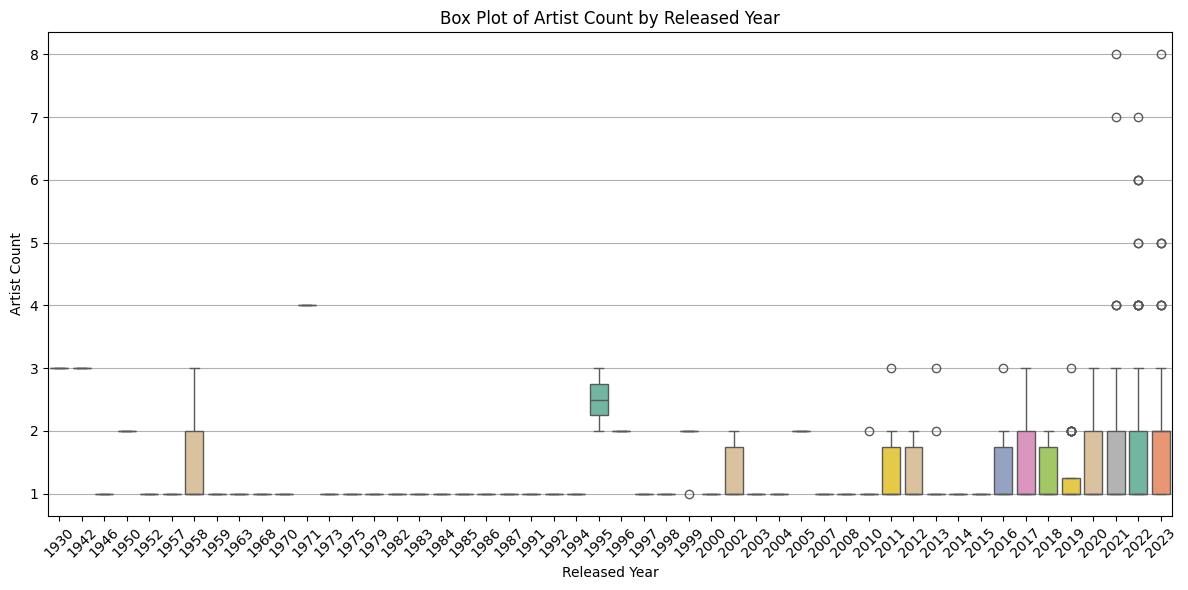

In [91]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_year', y='artist_count', data=M2[['released_year', 'artist_count']], palette='Set2')

plt.title('Box Plot of Artist Count by Released Year')
plt.xlabel('Released Year')
plt.ylabel('Artist Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Question 3**
* Which track has the highest number of streams? Display the top 5 most streamed tracks.
* Who are the top 5 most frequent artists based on the number of tracks in the dataset?

**TOP 5 Most Streamed Tracks**

C:\Users\Lumiere Fernandez\AppData\Local\Temp\ipykernel_12820\1014562062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_streamed_tracks, x='streams', y='track_name', palette='viridis')


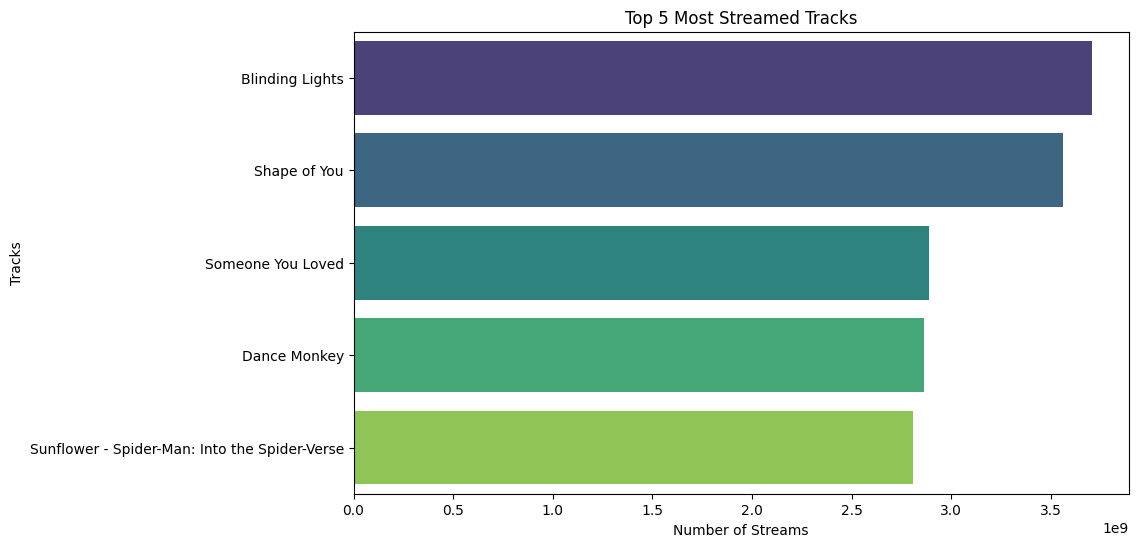

In [100]:
tracks = M2[['streams','track_name']]
top_streamed_tracks = tracks.nlargest(5, 'streams')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_streamed_tracks, x='streams', y='track_name', palette='viridis')
plt.title('Top 5 Most Streamed Tracks')
plt.xlabel('Number of Streams')
plt.ylabel('Tracks')
plt.show()

**TOP 5 Most Frequent Artist**

C:\Users\Lumiere Fernandez\AppData\Local\Temp\ipykernel_12820\2598366093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


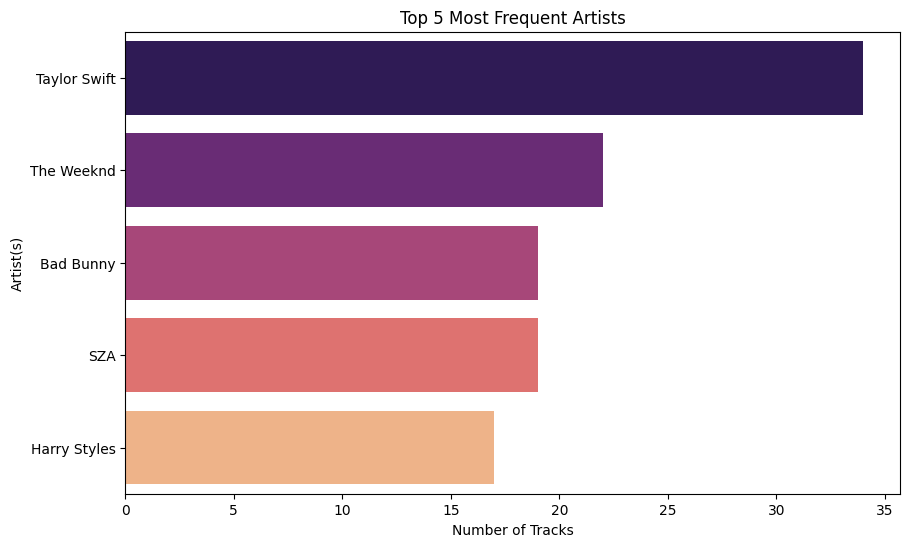

In [101]:
top_artists = M2['artist(s)_name'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 5 Most Frequent Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist(s)')
plt.show()

# **Question 4**
* Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
* Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

**The line graph shows the amount of tracks from a specific year that got into the most streamed spotify songs. It is noticeable that the years closer to 2023 had more streams than tracks farther away from 2023. The only caveat would be that 2023 tracks aren't the most streamed but rather the year prior (2022). This is could mean that newly released songs are still ramping up stream numbers and that spotify is gradually becoming more popular as the years go by**

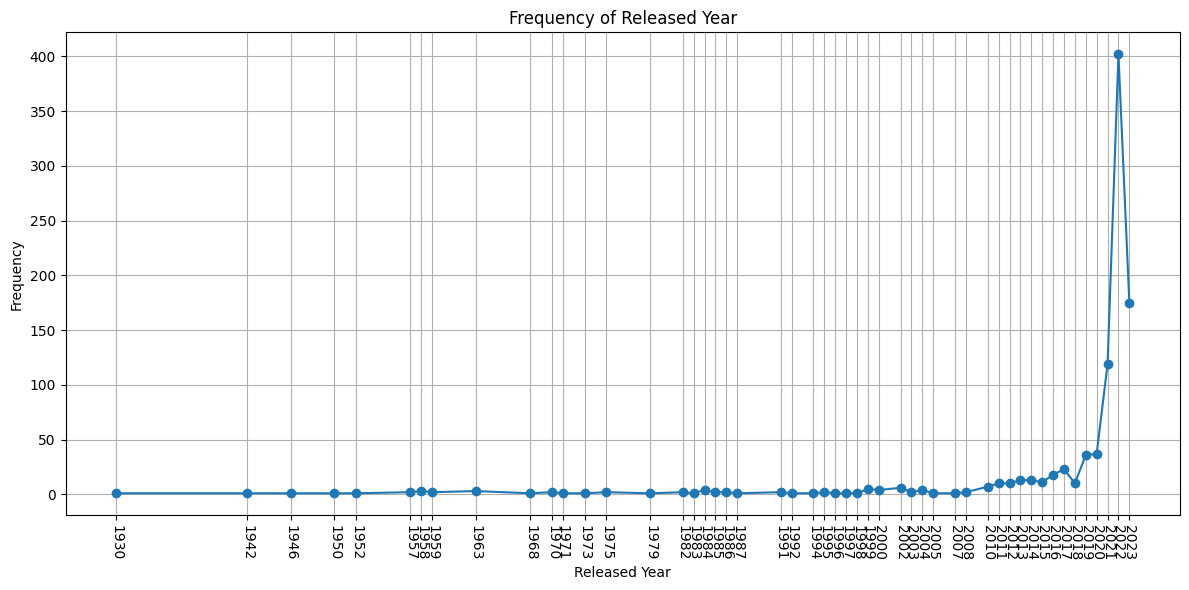

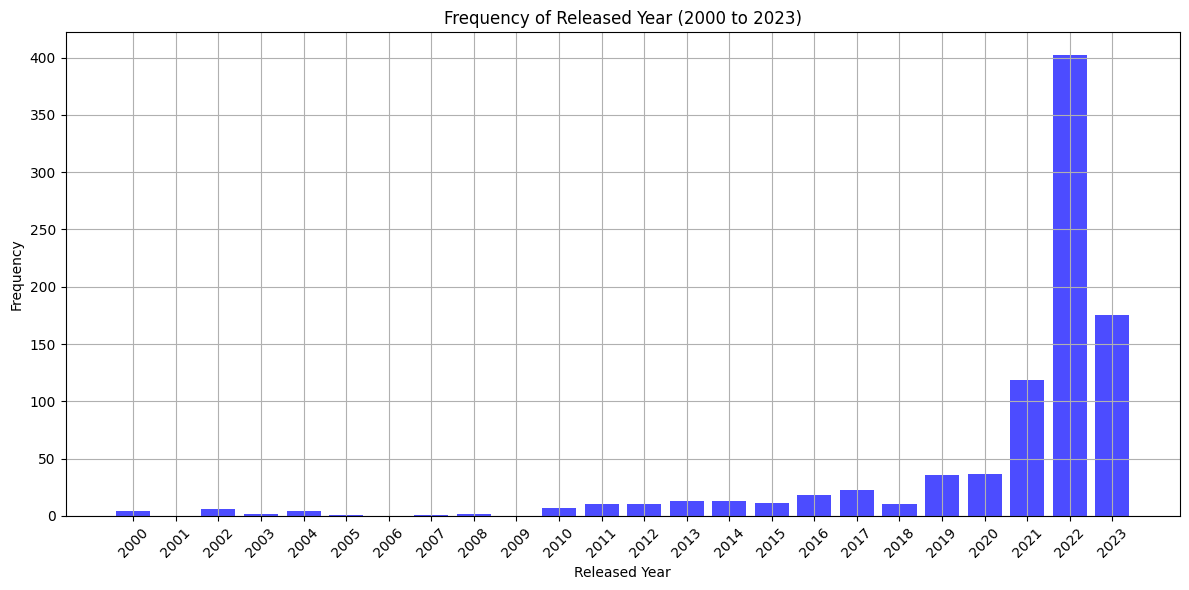

In [114]:
year_counts = M2['released_year'].dropna().value_counts().sort_index()

# Create a line graph of the frequency of each released year
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')

plt.title('Frequency of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')

# Set x-ticks to show every specific year
plt.xticks(year_counts.index, rotation=-90)  # Show all years with rotation for readability

plt.grid()
plt.tight_layout()
plt.show()

#2000 and up
# Filter year_counts for years between 2000 and 2023
year_counts = year_counts[(year_counts.index >= 2000) & (year_counts.index <= 2023)]

plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='blue', alpha=0.7)

plt.title('Frequency of Released Year (2000 to 2023)')
plt.xlabel('Released Year')
plt.ylabel('Frequency')

# Set x-ticks to show every specific year from 2000 to 2023
plt.xticks(range(2000, 2024), rotation=45)  # Show all years with rotation for readability

plt.grid()
plt.tight_layout()
plt.show()

**Identify the year with most ammount of streams in total**

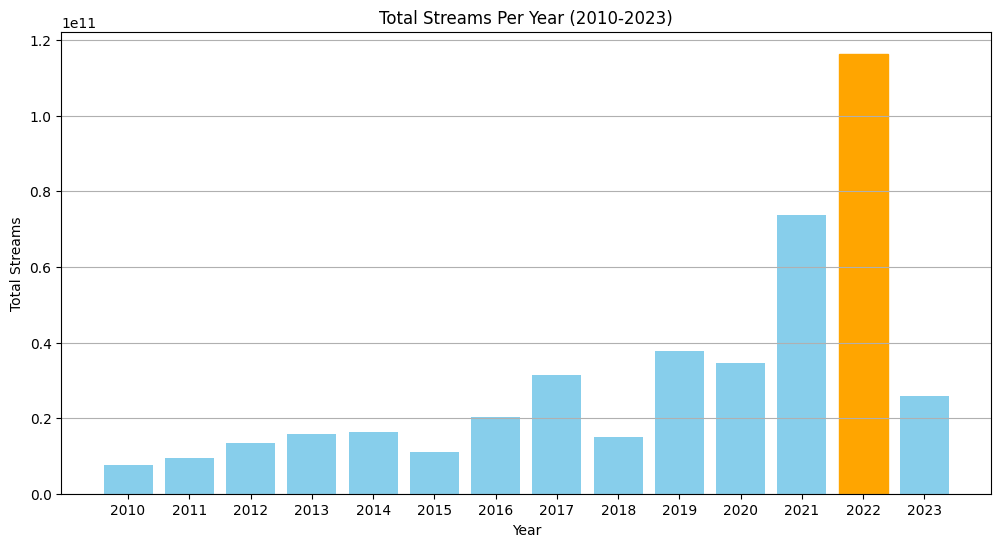

In [117]:
# Get the time period of interest
years = M2[(M2['released_year'] >= 2010) & (M2['released_year'] <= 2023)]

# Group by year and sum the streams
total_streams_per_year = years.groupby('released_year')['streams'].sum()

# Identify the year with the maximum streams
max_streams_year = total_streams_per_year.idxmax()
max_streams_value = total_streams_per_year.max()

plt.figure(figsize=(12, 6))
bars = plt.bar(total_streams_per_year.index, total_streams_per_year.values, color='skyblue')
plt.title('Total Streams Per Year (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Total Streams')

# Highlight the year with the most streams
for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == max_streams_year: # Identify which bar corresponds to the year with the max streams
        bar.set_color('orange')  # Highlight the bar

plt.xticks(total_streams_per_year.index)
plt.grid(axis='y')
plt.show()


**It seems that January and May are the most Popular months where songs get released. While august is the lowest.**

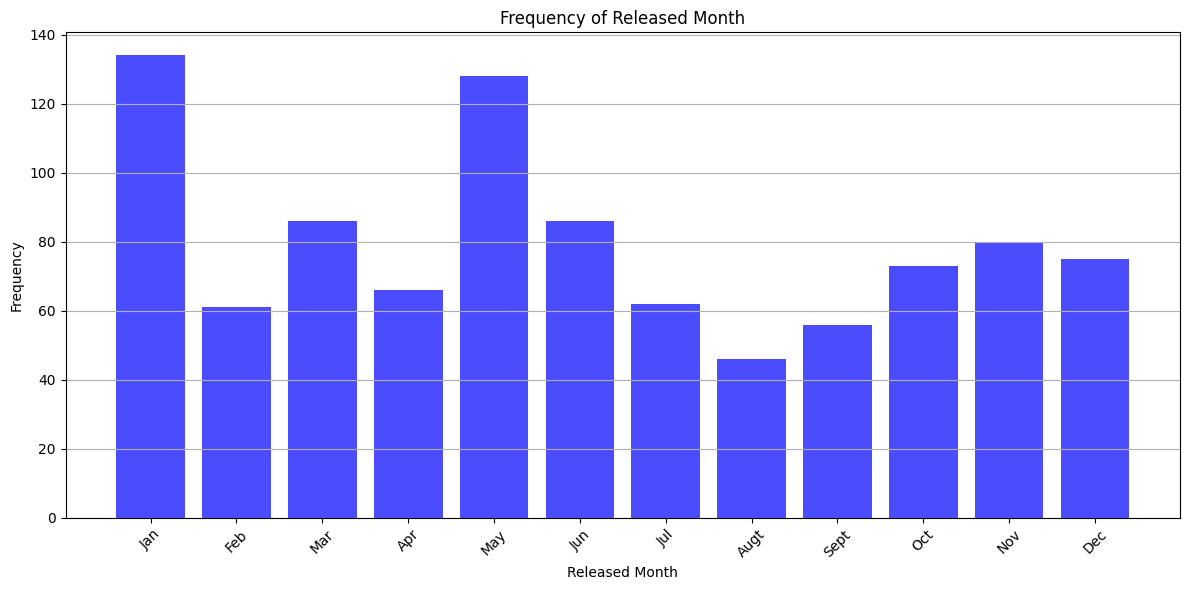

In [118]:
# Drop NaN values and count occurrences of each released month
month_counts = M2['released_month'].dropna().value_counts().sort_index()

# Create a bar graph of the frequency of each released month
plt.figure(figsize=(12, 6))
plt.bar(month_counts.index, month_counts.values, color='blue', alpha=0.7)

plt.title('Frequency of Released Month')
plt.xlabel('Released Month')
plt.ylabel('Frequency')

# Set x-ticks to show every specific month (as specified in the list month_names)
month_names = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Augt", "Sept", "Oct", "Nov", "Dec"
]

plt.xticks(month_counts.index, month_names, rotation=45)  # Show all months with rotation for readability

plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()
plt.show()

# **Question 5**
* Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
* Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

**Scatter Plot of danceability and energy vs their correlation with stream number**

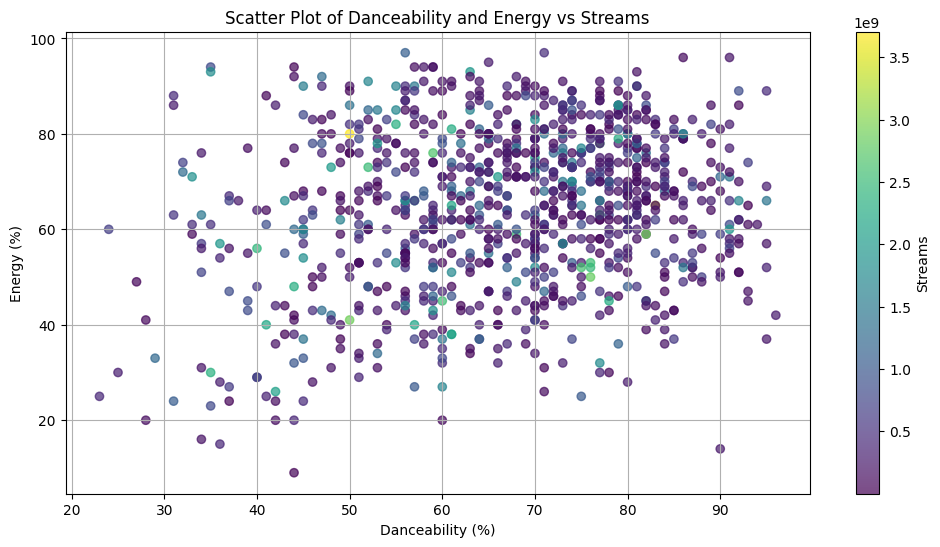

In [1020]:
# Create a scatter plot
scatter_data = M2[['danceability_%', 'energy_%', 'streams']]
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['danceability_%'], scatter_data['energy_%'], 
            c=scatter_data['streams'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Streams')  # Add color bar to represent streams
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.title('Scatter Plot of Danceability and Energy vs Streams')
plt.grid()
plt.show()

**Scatter plot but with emphasis to the tracks that performed the best. I am unable to tell if there is actually a significant change due to this two. But if I were to make an assumption energy percent in the 60-80 range and danceability in the 50-85 range seems to be topping the charts. Those in the middle of the 2 descriptors may be assumed to be the most repeatable songs wherein the listener is able to listen over and over again.**

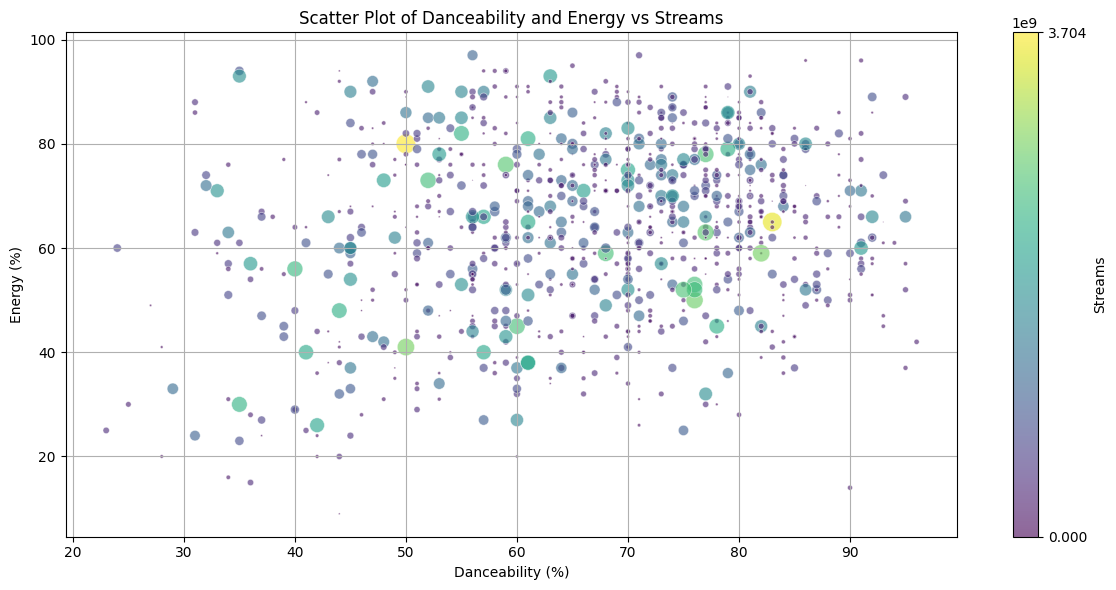

In [1021]:
# Drop rows with NaN values in the relevant columns
scatter_data = M2[['danceability_%', 'energy_%', 'streams']]

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Normalize the streams for size and coloring
norm = plt.Normalize(scatter_data['streams'].min(), scatter_data['streams'].max())
sizes = (scatter_data['streams'] / scatter_data['streams'].max()) * 200  # Scale sizes for better visibility

# Create the scatter plot with color gradient based on streams
scatter = plt.scatter(scatter_data['danceability_%'], 
                      scatter_data['energy_%'], 
                      s=sizes,  # Use the scaled sizes
                      alpha=0.6, 
                      c=scatter_data['streams'],  # Color based on streams directly
                      cmap='viridis',  # Use a colormap
                      edgecolors='w', 
                      linewidth=0.5)

# Set labels and title
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.title('Scatter Plot of Danceability and Energy vs Streams')

# Add a colorbar to indicate the streams
cbar = plt.colorbar(scatter, label='Streams')
cbar.set_label('Streams')  # Set colorbar label
cbar.set_ticks([scatter_data['streams'].min(), scatter_data['streams'].max()])  # Optional: Set specific ticks

plt.grid()
plt.tight_layout()
plt.show()

# **Question 6**
* How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?


**Since there are a lot of variables included and comparing all 3 without a specific basis is difficult. We've opted for a scatter plot matrix in which these values can be correlated by pairs. The Results indicate that there is a strong correlation between playlists(be it apple or spotify) to the ammount of strems (regularly going above the .70 mark), the playlist however seems to be the lowest correlation across the board. This is indicative that playlist inclusions is not a strong indicator of popularity. There is a diverse population of people with diverse music taste that include their personal tastes in playlist.**

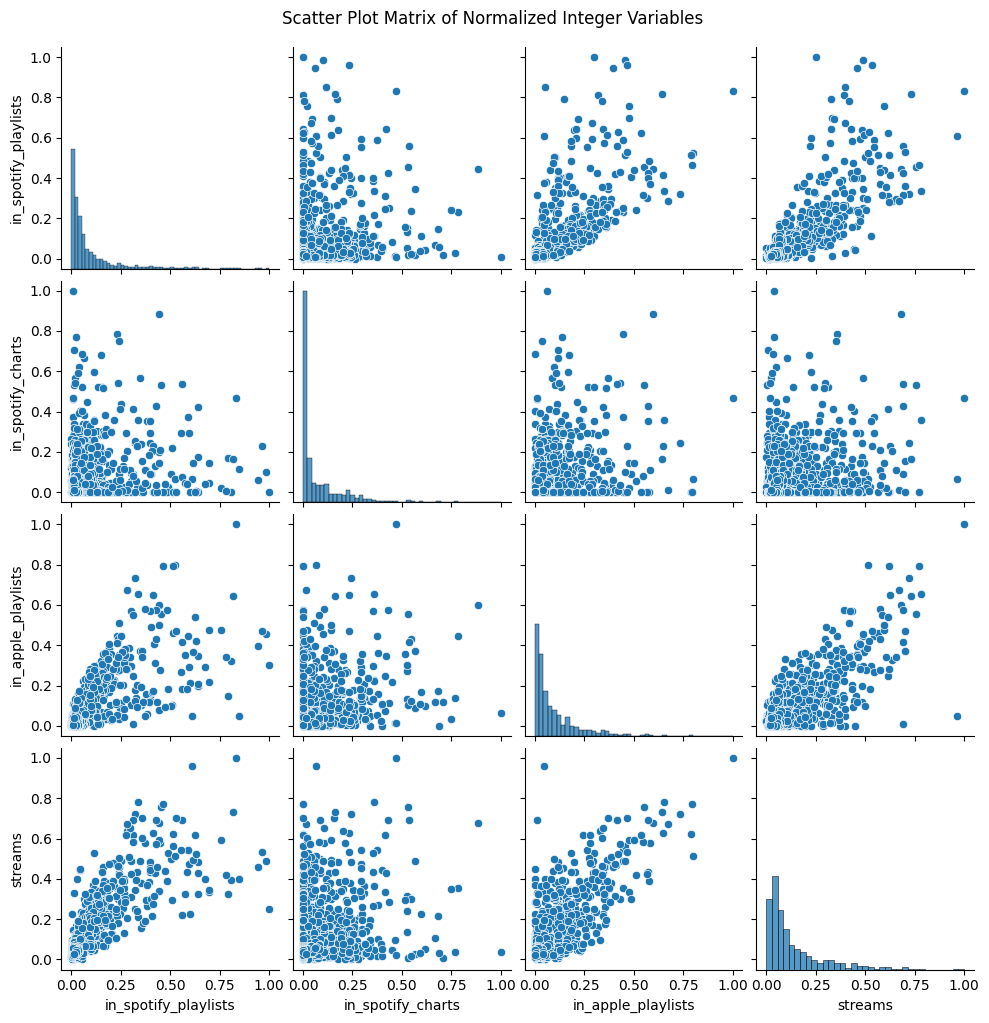

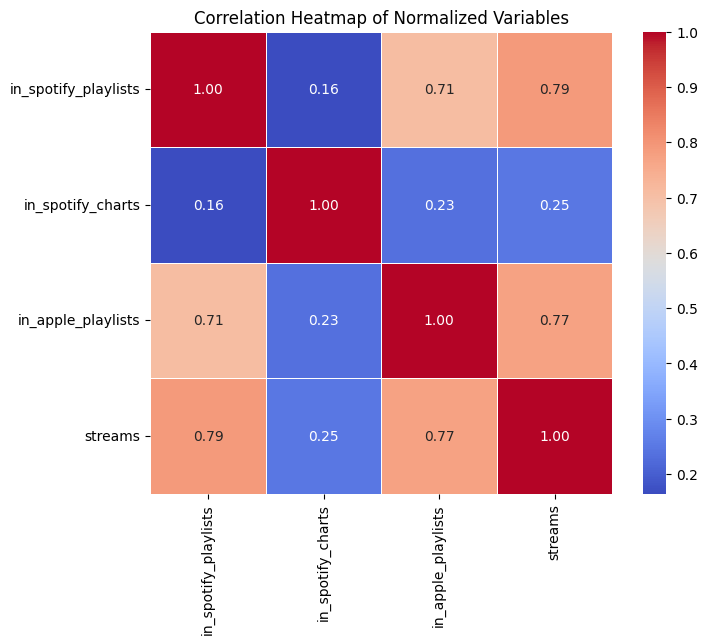

In [1022]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace infinite values with NaN
M2 = M2.replace([np.inf, -np.inf], np.nan)

# Select the relevant columns
variables = M2[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'streams']]

# Normalize the values using min-max normalization
normalized_variables = (variables - variables.min()) / (variables.max() - variables.min())

# 1. Scatter Plot Matrix
sns.pairplot(normalized_variables)
plt.suptitle('Scatter Plot Matrix of Normalized Integer Variables', y=1.02)
plt.show()

# 2. Heatmap of Correlations
correlation_matrix = normalized_variables.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Heatmap of Normalized Variables')
plt.show()


# **Question 7**
* Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
* Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

**The most popular songs are in the key C# Major**

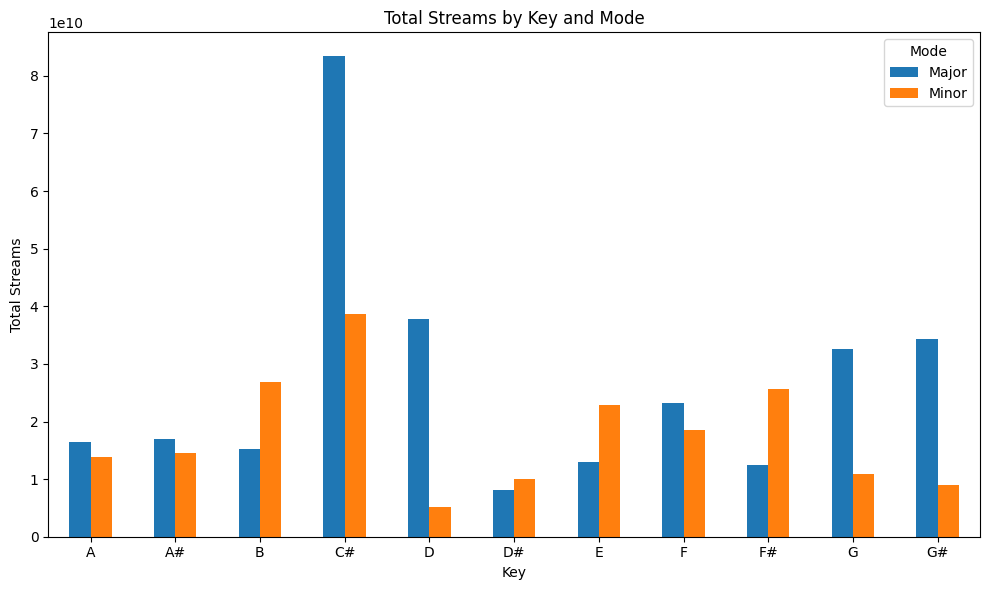

In [1023]:
grouped_data = M2.groupby(['key', 'mode'])['streams'].sum().unstack()

# Plotting
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Total Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Total Streams')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Mode')
plt.tight_layout()
plt.show()

**The top 20 artists in each chart and playlist, with the last pie chart showing the total pooled popularity. The values here are normalized. Collectively the most popular artist in playlists/charts is Taylor Swift followed by the Weeknd, Harry Styles, Ed Sheeran, and Bad Bunny making the head of this particular set of data**

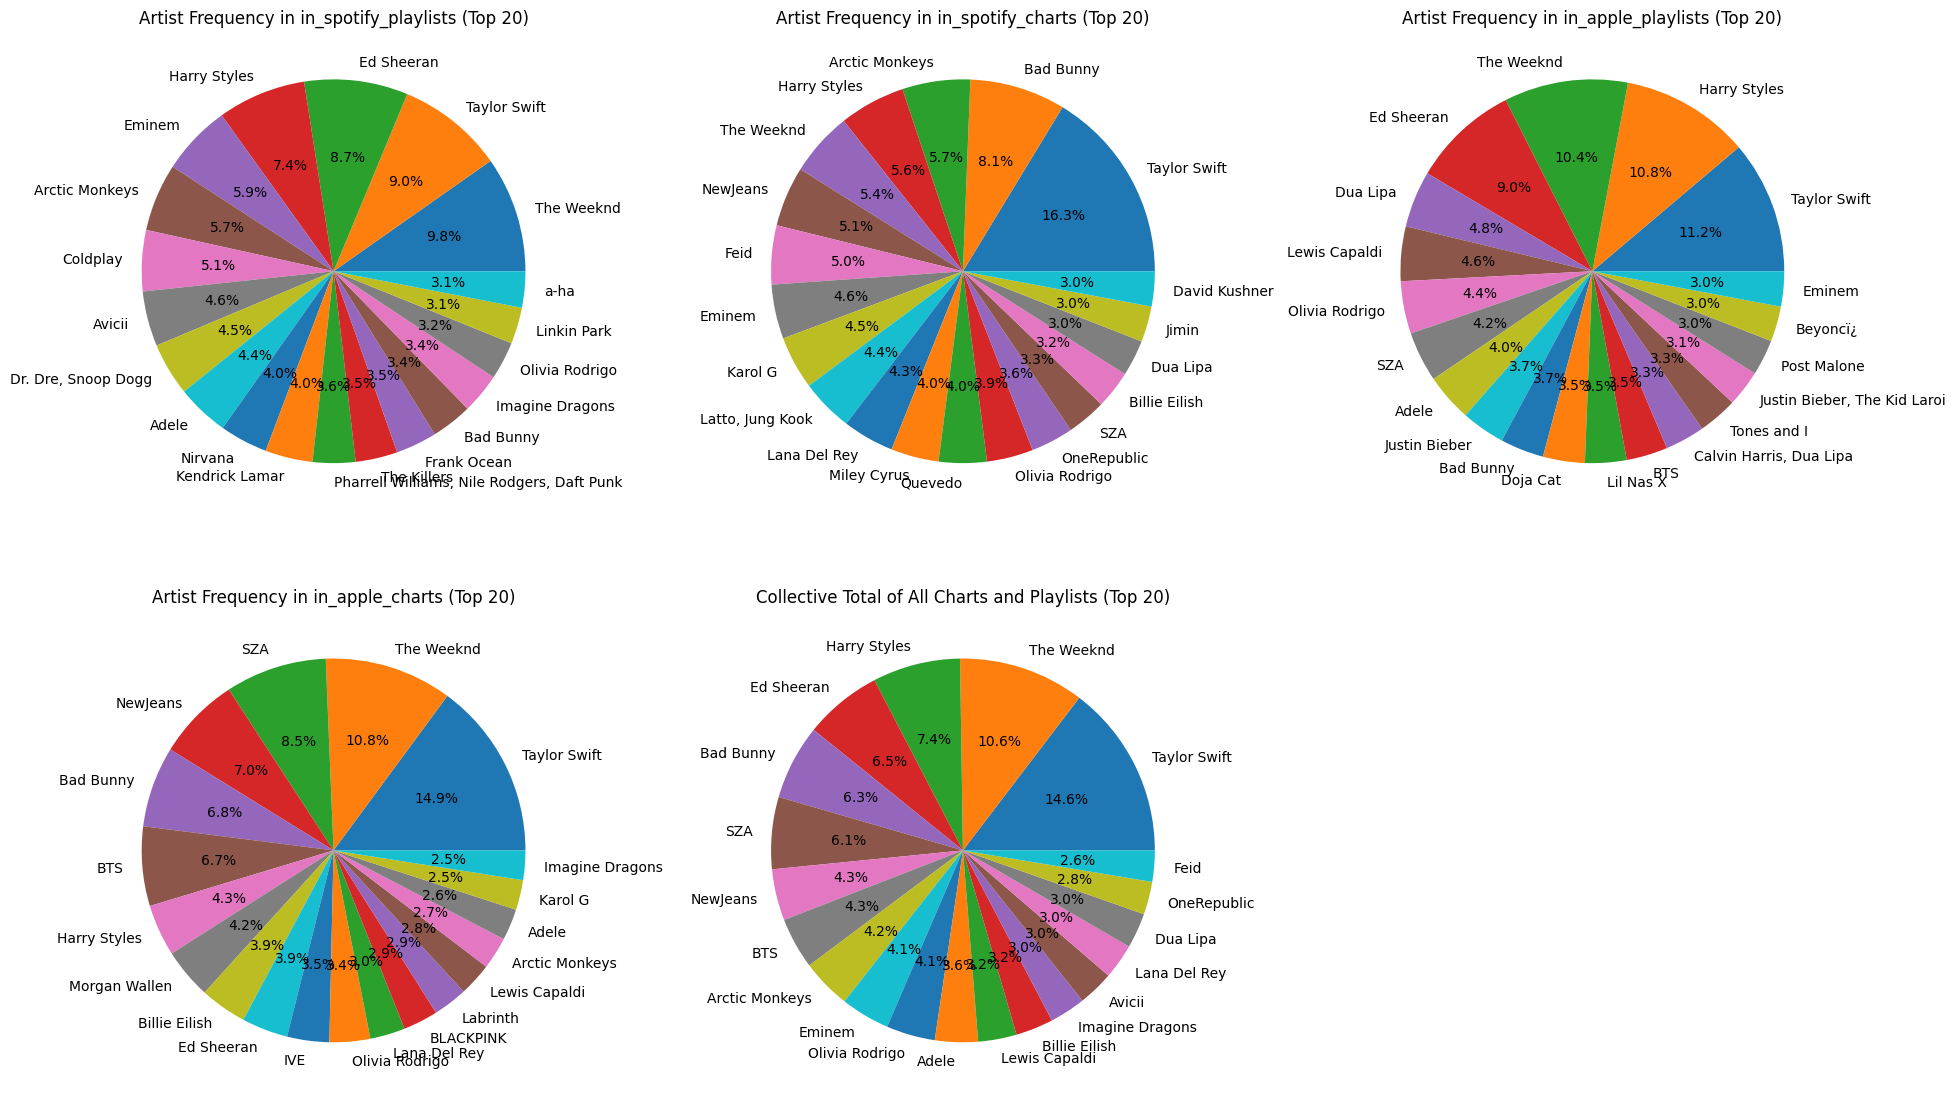

In [1025]:
# Normalize function
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize the specified columns
for column in ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']:
    M2[column] = normalize(M2[column])

# Create subplots for each variable
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  # Increased figure size
axs = axs.flatten()

columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']
for i, column in enumerate(columns):
    artist_counts = M2.groupby('artist(s)_name')[column].sum()
    top_artists = artist_counts.nlargest(20)
    top_artists_percentage = top_artists / top_artists.sum() * 100

    axs[i].pie(top_artists_percentage, labels=top_artists.index, autopct='%1.1f%%')
    axs[i].set_title(f'Artist Frequency in {column} (Top 20)')

# Pool together collective totals for top 20 artists
total_counts = M2.groupby('artist(s)_name')[columns].sum().sum(axis=1)
top_total_counts = total_counts.nlargest(20)
top_total_counts_percentage = top_total_counts / top_total_counts.sum() * 100

axs[4].pie(top_total_counts_percentage, labels=top_total_counts.index, autopct='%1.1f%%')
axs[4].set_title('Collective Total of All Charts and Playlists (Top 20)')

# Hide the last subplot if not needed
axs[5].axis('off')

plt.tight_layout(pad=3.0)  # Add padding
plt.show()